In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors
from scipy.special import erf
from functions import *


%matplotlib inline

In [13]:
def bohm_gross(lambda_k):
    return np.sqrt(1 + 3*lambda_k**2)
def omega_i_correction(k, v0 = 0, nb = 0):
    return np.pi/2 * bohm_gross(k)**3/k**2 * dfBOTdv(bohm_gross(k)/k,v0,nb) # I think that I don't need to include 1/n0

<Figure size 1800x1200 with 0 Axes>

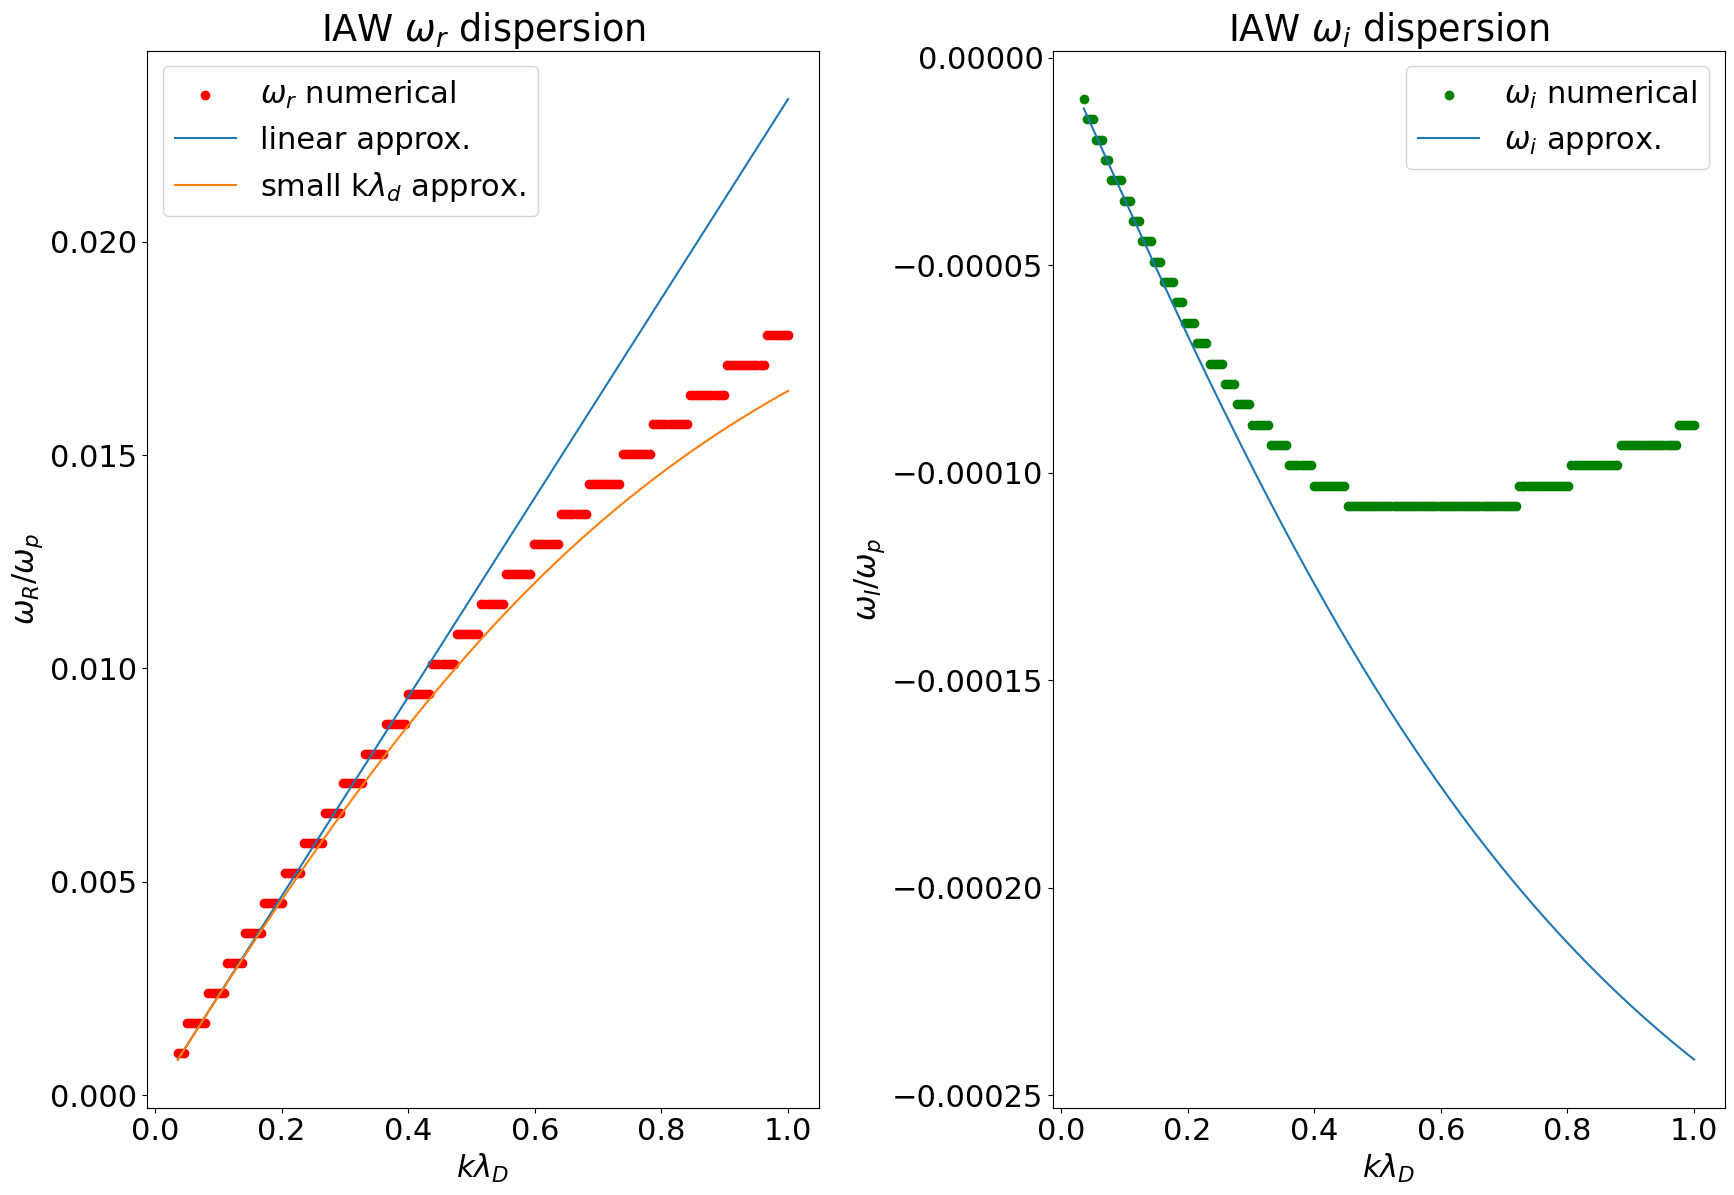

In [19]:
plt.rcParams.update({'font.size': 22})

fig1 = plt.figure(figsize=(18,12))
fig2 = plt.figure(figsize = (18,12))
ax1 = plt.subplot(1,2,1)
ax1.set_xlabel(r'$k\lambda_D$')
ax1.set_ylabel(r'$\omega_R/\omega_p$')

ax2 = plt.subplot(1,2,2)
ax2.set_xlabel(r'$k\lambda_D$')
ax2.set_ylabel(r'$\omega_I/\omega_p$')

k0s = np.linspace(0.036, 1, 200)

Ti_over_Te = .025 # Mess around with this parameter to see the T dependence. As one would expect, if Ti gets too small, IAWs are no longer able to propogate

wr_vals = []
wi_vals = []
for k0 in k0s:
    Wrs, Wis = find_w_roots_plasmapy(k0, Ti_over_Te,Wr_range = [0.001,0.09],Wi_range=[-0.00001,-0.0005])
    wr_vals.append(Wrs)
    wi_vals.append(Wis)
ax1.scatter(k0s, wr_vals, c = 'r', label = '$\omega_r$ numerical')
ax2.scatter(k0s, wi_vals, c = 'g', label = '$\omega_i$ numerical')

plt.tight_layout(h_pad=3)

#ax1.plot(k0s,np.sqrt(1/1836)*np.sqrt(1/(1+k0s**2)+ Ti_over_Te)) # This should be the full expression but it doesn't look right
ax1.plot(k0s, k0s*np.sqrt(1/1836.), label = "linear approx.")

ax1.plot(k0s, np.sqrt((1/1836)/(1+1/k0s**2)), label = 'small k$\lambda_d$ approx.')


wi_approx = -np.sqrt(np.pi/8)*(np.sqrt(1/1836.)+ (1/Ti_over_Te)**(3/2)*np.exp(-1/(2*Ti_over_Te)))
ax2.plot(k0s, np.sqrt((1/1836)/(1+1/k0s**2))*wi_approx, label = '$\omega_i$ approx.')

ax1.legend()
ax2.legend()
ax1.set_title('IAW $\omega_r$ dispersion')
ax2.set_title('IAW $\omega_i$ dispersion')
plt.savefig('IAW dispersion relations')


This looks... ok.

The IAW dispersion relation from fluid theory is: $\omega^2/k^2 = T_e/m_i$

If we normalize these units we get: $\frac{\omega^2}{\omega_p^2} \frac{1}{k^2 \lambda_d^2} = \frac{\omega'^2}{k'^2}= \frac{T_e}{m_i \omega_p^2 \lambda_d^2}$

$\frac{\omega'^2}{k'^2} = \frac{m_e}{m_i} \frac{1}{k_B}$

See above for graph

Maybe we can try making an animation of increasing T_ratio for the presentation?

<Figure size 1800x1200 with 0 Axes>

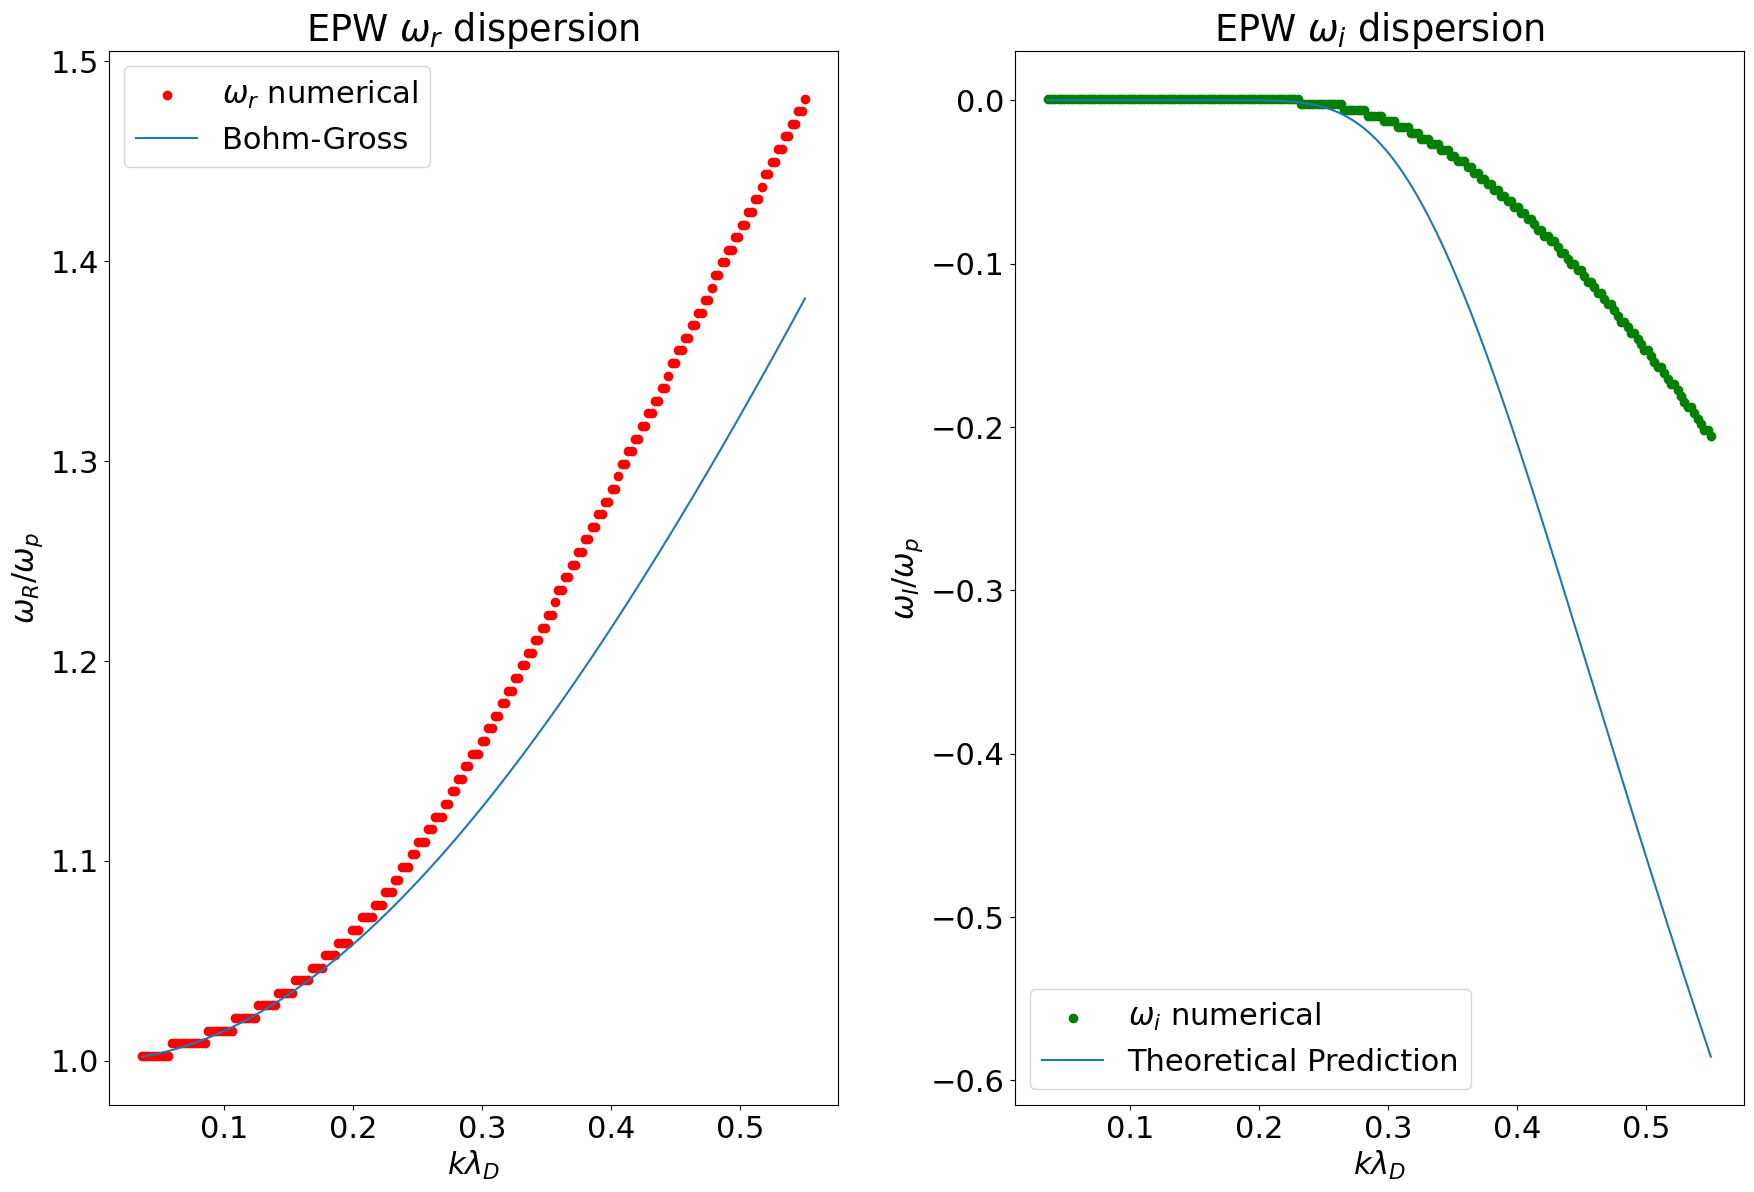

In [17]:
plt.rcParams.update({'font.size': 22})

fig1 = plt.figure(figsize=(18,12))
fig2 = plt.figure(figsize = (18,12))
ax1 = plt.subplot(1,2,1)
ax1.set_xlabel(r'$k\lambda_D$')
ax1.set_ylabel(r'$\omega_R/\omega_p$')

ax2 = plt.subplot(1,2,2)
ax2.set_xlabel(r'$k\lambda_D$')
ax2.set_ylabel(r'$\omega_I/\omega_p$')

k0s = np.linspace(0.036, 0.55, 200)

Ti_over_Te = .025 # Mess around with this parameter to see the T dependence. As one would expect, if Ti gets too small, IAWs are no longer able to propogate

wr_vals = []
wi_vals = []
for k0 in k0s:
    #Wrs, Wis = find_w_roots_plasmapy(k0, Ti_over_Te,Wr_range = [0.001,0.09],Wi_range=[-0.00001,-0.0005])
    #Wrs, Wis = find_w_roots_plasmapy(k0, Ti_over_Te,Wr_range = [0.001,0.09],Wi_range=[-0.00001,-0.0005])
    Wrs, Wis = find_w_roots_plasmapy(k0, Ti_over_Te,Wr_range = [0.7,1.5],Wi_range=[-0.3,0.05])
    wr_vals.append(Wrs)
    wi_vals.append(Wis)
ax1.scatter(k0s, wr_vals, c = 'r', label = '$\omega_r$ numerical')
ax2.scatter(k0s, wi_vals, c = 'g', label = '$\omega_i$ numerical')

plt.tight_layout(h_pad=3)

ax1.plot(k0s,bohm_gross(k0s), label = 'Bohm-Gross')
ax2.plot(k0s,omega_i_correction(k0s), label = 'Theoretical Prediction')

ax1.legend()
ax2.legend()
ax1.set_title('EPW $\omega_r$ dispersion')
ax2.set_title('EPW $\omega_i$ dispersion')
plt.savefig('EPW dispersion relations with ion motion')